# Part 0: Load data & Preprocessing

## 0.1: Data summary 

In [1]:
import pandas as pd
import numpy as np

In [45]:
data = pd.read_csv("https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv", sep = ',', header = 'infer')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 0.2: Check data types 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [19]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [16]:
data.country.dtype

dtype('O')

In [17]:
data.budget.dtype

dtype('float64')

In [22]:
data["movie_facebook_likes"].dtype

dtype('int64')

## 0.3: Simple data transformation
To prep for EDA 

In [46]:
# let's do some simple subset and data transformation
# drop unwanted columns
data = data.drop(["color", "facenumber_in_poster", "aspect_ratio"], axis = 1)

# transform budget and gross into millions of $ instead of $
data["budget"] = data["budget"].floordiv(1000000)
data["gross"] = data["gross"].floordiv(1000000)

In [47]:
# before we replace the NaNs, separate numeric and categorical features for different NaN treatments

numerical = []
categorical = []

for col in data.columns:
  if data[col].dtype == 'float64' or data[col].dtype == 'int64':
    numerical.append(col)
  else:
    categorical.append(col)

In [21]:
numerical

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

In [22]:
categorical

['director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [48]:
# check how many NaNs appear in the numerical columns
print("Number of missing values in each numerical column \n")
for c in numerical:
  print(c,": ", data[c].isnull().sum())

Number of missing values in each numerical column 

num_critic_for_reviews :  50
duration :  15
director_facebook_likes :  104
actor_3_facebook_likes :  23
actor_1_facebook_likes :  7
gross :  884
num_voted_users :  0
cast_total_facebook_likes :  0
num_user_for_reviews :  21
budget :  492
title_year :  108
actor_2_facebook_likes :  13
imdb_score :  0
movie_facebook_likes :  0


In [49]:
# check how many NaNs appear in the categorical columns
print("Number of missing values in each categorical column \n")
for c in categorical:
  print(c,": ", data[c].isnull().sum())

Number of missing values in each categorical column 

director_name :  104
actor_2_name :  13
genres :  0
actor_1_name :  7
movie_title :  0
actor_3_name :  23
plot_keywords :  153
movie_imdb_link :  0
language :  12
country :  5
content_rating :  303


From the categorical NaN counts above, we can see that the missing values aren't significant. A little bit more for content_rating and plot_keywords, but I don't think they are not important enough to break down by genres and find similar movies to replace custom values. 

We will replace all categorical NaNs to "".

In [126]:
# let's copy our current dataframe for insurance
df = data.copy()
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [127]:
df['genres'] = df['genres'].str.split('|',expand=False)

In [128]:
df['plot_keywords'] = df['plot_keywords'].str.split('|',expand=False)

In [99]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,"[avatar, future, marine, native, paraplegic]",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,"[goddess, marriage ceremony, marriage proposal...",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0,2007,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,"[bomb, espionage, sequel, spy, terrorist]",http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0,2015,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,"[deception, imprisonment, lawlessness, police ...",http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0,2012,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,0,12.0,7.1,0


In [129]:
# split genres and plot_keywords into columns of tuples

# df.drop("first_genre", axis = 1)
df['first_genre'] = df['genres'].apply(lambda x: x[0])


In [130]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,"[avatar, future, marine, native, paraplegic]",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009.0,936.0,7.9,33000,Action
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,"[goddess, marriage ceremony, marriage proposal...",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0,2007.0,5000.0,7.1,0,Action
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,"[bomb, espionage, sequel, spy, terrorist]",http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0,2015.0,393.0,6.8,85000,Action
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,"[deception, imprisonment, lawlessness, police ...",http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0,2012.0,23000.0,8.5,164000,Action
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0,Documentary


In [66]:
df.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009.0,936.0,7.9,33000


In [52]:
df.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,year
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009.0,936.0,7.9,33000,1970-01-01 00:00:00.000002009


## 0.4: Missing Values for Categorical attributes

In [142]:
df2 = df.copy()

In [143]:
df2['director_name'] = df2['director_name'].fillna('')

In [144]:
df2['director_name'].isna().any()

False

In [145]:
df2['actor_2_name'] = df2['actor_2_name'].fillna('')
df2['actor_1_name']= df2['actor_1_name'].fillna('')
df2['actor_3_name']= df2['actor_3_name'].fillna('')
df2['plot_keywords'] = df2['plot_keywords'].fillna('')
df2['language'] = df2['language'].fillna('')
df2['country'] = df2['country'].fillna('')
df2['content_rating'] = df2['content_rating'].fillna('')

In [146]:
# check whether our replacement worked
print("Number of missing values in each categorical column \n")
df2.info()

Number of missing values in each categorical column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              5043 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5043 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5043 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  

As we can see from the info() above, all categorical features do not have NaNs anymore.

## 0.5: Missing Values for Numerical attributes

As we can see above, gross and budget have the most amount of missing values, and quite significant. gross has almost 20% and budget, almost 10% of the entire dataset (5000+ rows). 

For the other columns, we'll fill NaN with average, and for gross and budget, we'll decide whether to use mean = grouped by genres. 

*I.e.: We assume that the gross and budget should be relative to the same genres. It doesn't make sense to compare a blockbuster action movie to a romantic comedy movie, the gross and budget in this assumption will be inheritly different across genres.*

### 0.5.1: Check average budget and gross by genre

In [24]:
# getting subset df from data that just contains movie_title, genres, budget and gross
genres_df = df[["movie_title","genres", "budget", "gross"]]
genres_df.head()

,movie_title,genres,budget,gross
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237.0,760.0
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300.0,309.0
2,Spectre,Action|Adventure|Thriller,245.0,200.0
3,The Dark Knight Rises,Action|Thriller,250.0,448.0
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN


In [25]:
# because we want to see the average and median budget and gross from each genre, without having the NaNs impact the results
# we will take another subset of this df with only the non NaN ones

genres_df_actual = genres_df.dropna().reset_index(drop = True)

In [26]:
genres_df_actual.head()

,movie_title,genres,budget,gross
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237.0,760.0
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300.0,309.0
2,Spectre,Action|Adventure|Thriller,245.0,200.0
3,The Dark Knight Rises,Action|Thriller,250.0,448.0
4,John Carter,Action|Adventure|Sci-Fi,263.0,73.0


In [30]:
splitted = genres_df_actual['genres'].str.split('|')  
l = splitted.str.len()
a = genres_df_actual["budget"]
b = genres_df_actual["gross"]
 
splitted_b_g = pd.DataFrame({'budget': np.repeat(a, l), 'gross': np.repeat(b, l),'genre':np.concatenate(splitted)})

In [31]:
splitted_b_g.reset_index()

,index,budget,gross,genre
0,0,237.0,760.0,Action
1,0,237.0,760.0,Adventure
2,0,237.0,760.0,Fantasy
3,0,237.0,760.0,Sci-Fi
4,1,300.0,309.0,Action
...,...,...,...,...
11537,3888,0.0,2.0,Romance
11538,3888,0.0,2.0,Thriller
11539,3889,0.0,0.0,Comedy
11540,3889,0.0,0.0,Drama


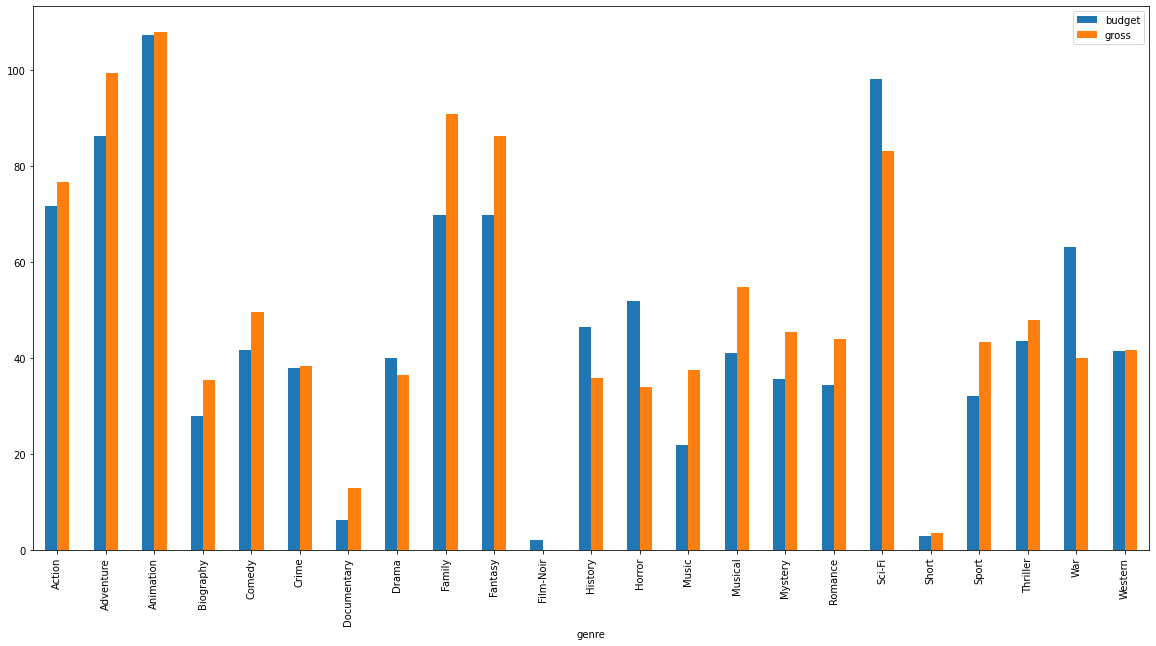

In [39]:
# mean budget by genre
grouped_mean = splitted_b_g.groupby("genre").mean().reset_index()
grouped_mean.plot.bar(x='genre', y=['budget','gross'], figsize = (20, 10))


As we can see, the averages across genres can vary significantly, which proved why we need to use average by genre to replace movies with NaN budget and gross values.

In [40]:
grouped_mean.head()

,genre,budget,gross
0,Action,71.793814,76.716495
1,Adventure,86.240252,99.361006
2,Animation,107.386935,107.914573
3,Biography,28.012295,35.512295
4,Comedy,41.728657,49.570483


### 0.5.2: Replace movies with NaN budget and gross by the mean values by genre

Here's a question: in the original data, many movies are tagged with more than one genre. Which genre's budget / gross mean do we choose from?

Assumption: The first genre tagged represents the "strongest association" and thus we will assume that movie should choose mean numbers from the first genre.

In [158]:
# making another df copy for insurance again
df3 = df2.copy()

In [164]:
# budget mean fill
df3['budget'] = df3.groupby('first_genre').transform(lambda x: x.fillna(x.mean()))['budget']
# alternative way
# df3.loc[df3.budget.isnull(), 'budget'] = df.groupby('"first_Genre"').value.transform('mean')

In [168]:
df3.loc[df3['budget'].isna()]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre
2464,Nimród Antal,103.0,93.0,190.0,151.0,Mackenzie Gray,364.0,3.0,[Music],James Hetfield,Metallica Through the Never,13359,1083,Lars Ulrich,"[headbanger, metallica, roadie, song in title,...",http://www.imdb.com/title/tt2172935/?ref_=fn_t...,56.0,English,USA,R,NaN,2013.0,253.0,7.2,19000,Music
4767,Patrick Gilles,NaN,90.0,0.0,569.0,Dylan Baker,970.0,NaN,[History],Emma Caulfield,America Is Still the Place,22,3359,Mike Colter,,http://www.imdb.com/title/tt3417110/?ref_=fn_t...,NaN,English,USA,,NaN,2015.0,812.0,7.5,337,History


In [169]:
df3.loc[df3['first_genre'] == 'Music']

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre
2464,Nimród Antal,103.0,93.0,190.0,151.0,Mackenzie Gray,364.0,3.0,[Music],James Hetfield,Metallica Through the Never,13359,1083,Lars Ulrich,"[headbanger, metallica, roadie, song in title,...",http://www.imdb.com/title/tt2172935/?ref_=fn_t...,56.0,English,USA,R,NaN,2013.0,253.0,7.2,19000,Music


In [170]:
df3.loc[df3['first_genre'] == 'History']

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre
4767,Patrick Gilles,NaN,90.0,0.0,569.0,Dylan Baker,970.0,NaN,[History],Emma Caulfield,America Is Still the Place,22,3359,Mike Colter,,http://www.imdb.com/title/tt3417110/?ref_=fn_t...,NaN,English,USA,,NaN,2015.0,812.0,7.5,337,History


Because both Music and History only has one row and each has budget of Nan, and the history entry also has gross of NaN, we will drop these two rows.

In [176]:
mask = df3['first_genre'].isin(['Music', 'History'])
df3 = df3.loc[~mask]

In [177]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5041 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              5041 non-null   object 
 1   num_critic_for_reviews     4992 non-null   float64
 2   duration                   5026 non-null   float64
 3   director_facebook_likes    4937 non-null   float64
 4   actor_3_facebook_likes     5018 non-null   float64
 5   actor_2_name               5041 non-null   object 
 6   actor_1_facebook_likes     5034 non-null   float64
 7   gross                      4158 non-null   float64
 8   genres                     5041 non-null   object 
 9   actor_1_name               5041 non-null   object 
 10  movie_title                5041 non-null   object 
 11  num_voted_users            5041 non-null   int64  
 12  cast_total_facebook_likes  5041 non-null   int64  
 13  actor_3_name               5041 non-null   objec

In [180]:
# next we do the same to fill gross with mean gross by genre
# doing another df copy to dodge SettingWithCopyWarning
df4 = df3.copy()
df4.gross = df4.groupby('first_genre').transform(lambda x: x.fillna(x.mean()))['gross']


In [181]:
df4.gross.isna().any()

True

In [182]:
df4.loc[df4['gross'].isna()]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre
2143,,5.0,60.0,NaN,NaN,,98.0,NaN,"[Game-Show, Reality-TV, Romance]",Chris Harrison,The Bachelor,4398,98,,"[bachelor, seeking love, single guy, tv host, ...",http://www.imdb.com/title/tt0313038/?ref_=fn_t...,33.0,English,USA,,3.0,NaN,NaN,2.9,141,Game-Show
4410,Alfred Hitchcock,97.0,95.0,13000.0,82.0,Rhonda Fleming,472.0,NaN,"[Film-Noir, Mystery, Romance, Thriller]",Norman Lloyd,Spellbound,32927,896,Leo G. Carroll,"[amnesia, dream analysis, dream sequence, guil...",http://www.imdb.com/title/tt0038109/?ref_=fn_t...,161.0,English,USA,Unrated,1.0,1945.0,239.0,7.6,0,Film-Noir


We'll drop these two rows as well.

In [183]:
df4 = df4.loc[~df4['gross'].isna()]

In [184]:
df4.shape

(5039, 26)

In [200]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4932 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4932 non-null   object 
 1   num_critic_for_reviews     4892 non-null   float64
 2   duration                   4920 non-null   float64
 3   director_facebook_likes    4932 non-null   float64
 4   actor_3_facebook_likes     4914 non-null   float64
 5   actor_2_name               4932 non-null   object 
 6   actor_1_facebook_likes     4925 non-null   float64
 7   gross                      4932 non-null   float64
 8   genres                     4932 non-null   object 
 9   actor_1_name               4932 non-null   object 
 10  movie_title                4932 non-null   object 
 11  num_voted_users            4932 non-null   int64  
 12  cast_total_facebook_likes  4932 non-null   int64  
 13  actor_3_name               4932 non-null   objec

In [199]:
# drop rows without a year, because we cannot assume what year a movie came out based on other given info
df4 = df4.loc[~df4['title_year'].isna()]

In [201]:
df4["title_year"] = df4["title_year"].astype(int)

In [203]:
df4.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,"[avatar, future, marine, native, paraplegic]",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009,936.0,7.9,33000,Action,2009.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,"[goddess, marriage ceremony, marriage proposal...",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0,2007,5000.0,7.1,0,Action,2007.0


In [205]:
df4.drop('year', axis = 1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.000000,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,"[avatar, future, marine, native, paraplegic]",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.000000,2009,936.0,7.9,33000,Action
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.000000,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,"[goddess, marriage ceremony, marriage proposal...",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.000000,2007,5000.0,7.1,0,Action
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.000000,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,"[bomb, espionage, sequel, spy, terrorist]",http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.000000,2015,393.0,6.8,85000,Action
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.000000,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,"[deception, imprisonment, lawlessness, police ...",http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.000000,2012,23000.0,8.5,164000,Action
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.000000,"[Action, Adventure, Sci-Fi]",Daryl Sabara,John Carter,212204,1873,Polly Walker,"[alien, american civil war, male nipple, mars,...",http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.000000,2012,632.0,6.6,24000,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,0.000000,"[Comedy, Drama]",Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,[written and directed by cast member],http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,0.000000,2011,205.0,6.4,413,Comedy
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,35.093557,"[Comedy, Drama]",Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,"[fraud, postal worker, prison, theft, trial]",http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,,31.480786,2013,470.0,7.7,84,Comedy
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,27.731613,"[Drama, Horror, Thriller]",Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,,0.000000,2013,0.0,6.3,16,Drama
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,0.000000,"[Comedy, Drama, Romance]",Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,31.480786,2012,719.0,6.3,660,Comedy


### 0.5.3: Fill numerical columns (other than budget, gross, and target variable imdb_score) with mean

In [207]:
# check which cols are numerical again
nums= []

for col in df4.columns:
  if df4[col].dtype == 'float64' or df4[col].dtype == 'int64':
    nums.append(col)



In [208]:
nums

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'year']

In [211]:
# remove budget, gross, and imdb_score
nums.remove('gross')

In [212]:
nums.remove('budget')
nums.remove('imdb_score')

In [213]:
nums

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'title_year',
 'actor_2_facebook_likes',
 'movie_facebook_likes',
 'year']

In [216]:
df4[nums] = df4[nums].fillna(value=df4[nums].mean())

In [217]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4932 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4932 non-null   object 
 1   num_critic_for_reviews     4932 non-null   float64
 2   duration                   4932 non-null   float64
 3   director_facebook_likes    4932 non-null   float64
 4   actor_3_facebook_likes     4932 non-null   float64
 5   actor_2_name               4932 non-null   object 
 6   actor_1_facebook_likes     4932 non-null   float64
 7   gross                      4932 non-null   float64
 8   genres                     4932 non-null   object 
 9   actor_1_name               4932 non-null   object 
 10  movie_title                4932 non-null   object 
 11  num_voted_users            4932 non-null   int64  
 12  cast_total_facebook_likes  4932 non-null   int64  
 13  actor_3_name               4932 non-null   objec

In [218]:
# now we write df4 to file, save on google drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [219]:
df4.to_csv('clean_imdb.csv')
!cp clean_imdb.csv "drive/My Drive/"